In [16]:
# Libraries

import sys
import math
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
from datetime import datetime, timedelta
import folium
import webbrowser
import win32com.client as win32

In [17]:
# Inital information

# url without under offer properties
url_wo_uo = 'https://propertylink.estatesgazette.com/commercial-property-for-rent/bath/page-1?filters%5Bnot_property_states%5D%5B%5D=Under+Offer&filters%5Bto_let_price%5D%5Bcurrency%5D=gbp&filters%5Bto_let_price%5D%5Bfrom%5D=&filters%5Bto_let_price%5D%5Bsize_modifier%5D=sqft&filters%5Bto_let_price%5D%5Bto%5D=&search=Bath&sort_direction=desc&sort_field=created_at&view=grid'
# url including under offer properties
url_inc_uo ='https://propertylink.estatesgazette.com/commercial-property-for-rent/bristol/page-1?filters%5Bto_let_price%5D%5Bcurrency%5D=gbp&filters%5Bto_let_price%5D%5Bfrom%5D=&filters%5Bto_let_price%5D%5Bsize_modifier%5D=sqft&filters%5Bto_let_price%5D%5Bto%5D=&search=Bristol&sort_direction=desc&sort_field=created_at&view=grid'
html = requests.get(url_inc_uo)
soup = bs(html.text, 'html.parser')

body = soup.find('body')
header = body.find('div', class_ = 'results-header mt-5')
property_count = int(header.find('div', class_ = 'results-message').contents[0].strip())
pages_needed = math.ceil(property_count / 24)
# extra pages only include featured properties - so doesn't go past max. page index.

print(f"There are {property_count} properties on the website currently.\nSo {pages_needed} pages are needed.")

There are 478 properties on the website currently.
So 20 pages are needed.


In [18]:
# Function for getting links

def get_links(soup):
    links = []

    i = 1
    max_iterations = 30
    while len(links) < 24 and i <= max_iterations:
        elements = soup.select(f"body > div.container.mt-3 > div.results.row > div:nth-child({i}) > div.card.h-100.card--results > a")
        # Featured properties still appear elsewhere - so aren't needed. It also causes a break when an empty page is reached.
        # Under offer properties also appear elsewhere or the element path is the same idk.
        # if not elements:
        #     elements = soup.select(f"body > div.container.mt-3 > div.results.row > div:nth-child({i}) > div.card.h-100.card--under-offer > a")

        if not elements:
            i += 1
            continue

        for element in elements:
            href = element['href']
            link = 'https://propertylink.estatesgazette.com'+ href
            links.append(link)
        i += 1

    return links


all_links = get_links(soup)


In [19]:
# Looping through pages

base_url = 'https://propertylink.estatesgazette.com/commercial-property-for-rent/bath/page-{}?filters%5Bnot_property_states%5D%5B%5D=Under+Offer&filters%5Bto_let_price%5D%5Bcurrency%5D=gbp&filters%5Bto_let_price%5D%5Bfrom%5D=&filters%5Bto_let_price%5D%5Bsize_modifier%5D=sqft&filters%5Bto_let_price%5D%5Bto%5D=&search=Bath&sort_direction=desc&sort_field=created_at&view=grid'

url_inc_uo ='https://propertylink.estatesgazette.com/commercial-property-for-rent/bristol/page-{}?filters%5Bto_let_price%5D%5Bcurrency%5D=gbp&filters%5Bto_let_price%5D%5Bfrom%5D=&filters%5Bto_let_price%5D%5Bsize_modifier%5D=sqft&filters%5Bto_let_price%5D%5Bto%5D=&search=Bristol&sort_direction=desc&sort_field=created_at&view=grid'

all_links = []  # Store all links from all pages

for page_num in range(1, pages_needed+1):  
    url = url_inc_uo.format(page_num)
    html = requests.get(url)
    soup = bs(html.text, 'html.parser')
    
    page_links = get_links(soup)
    all_links.extend(page_links)  # Add the links from this page to the all_links list

    print(f"Page {page_num} has {len(page_links)} links.")

property_links = list(set(all_links)) # removing duplicates
print(f"Total links collected: {len(property_links)}")


Page 1 has 23 links.
Page 2 has 23 links.
Page 3 has 23 links.
Page 4 has 23 links.
Page 5 has 23 links.
Page 6 has 23 links.
Page 7 has 23 links.
Page 8 has 23 links.
Page 9 has 23 links.
Page 10 has 23 links.
Page 11 has 23 links.
Page 12 has 23 links.
Page 13 has 23 links.
Page 14 has 23 links.
Page 15 has 23 links.
Page 16 has 23 links.
Page 17 has 23 links.
Page 18 has 23 links.
Page 19 has 23 links.
Page 20 has 23 links.
Total links collected: 460


In [20]:
# Single property test

single_link = property_links[4]
single_link = 'https://propertylink.estatesgazette.com/property-details/6987959-suite-5-western-house-2-rush-hill-bath-somerset-ba2-2qh'
print(single_link)

html = requests.get(single_link)
soup = bs(html.text, 'html.parser')

# soup.select('body > div.details-section.details-agent-contacts > div > div > div > div.col-md-4.col-12 > div.agent-name')
agent_name = soup.find('div', class_='agent-name').find_all_next(string=True)[1].strip()


agency_name = soup.select_one('body > div.details-section.details-agent-contacts > div > div > div > div.col-md-4.col-12 > div.agent-logo > img')
if agency_name == None:
    agency_name = soup.select_one('body > div.details-section.details-agent-contacts > div > div > div > div.col-md-4.col-12 > div.agent-logo > a > img')
agency_name = agency_name['alt']

agency_name = soup.find("meta", {"name": "gwa_advertiserName"})
agency_name = agency_name.get("content")



id_tag = soup.find("meta", {"name": "gwa_contentID"})
id_tag = id_tag.get("content")

# address = soup.select('body > div.wrapper > div.container-wrapper.bg-white > div > div:nth-child(5) > div.details-section-body.row > div:nth-child(3)') # Full div
# address = address[0].get_text(strip=True) # gives address with below stuck to the front
# address = address.replace("ADDRESS", "").strip() #tidy

address = soup.select('body > div.wrapper > div.container-wrapper.bg-white > div > h1')
address = address[0].get_text(strip=True)
address = address.replace("sharebookmark", "").strip() #tidy

size = soup.select('body > div.wrapper > div.container-wrapper.bg-white > div > div:nth-child(5) > div.details-section-body.row > div:nth-child(2)')
size = size[0].get_text(strip=True) # gives size with below stuck to the front
size = size.replace("SIZE", "").strip() #tidy

type = soup.select('body > div.wrapper > div.container-wrapper.bg-white > div > div:nth-child(5) > div.details-section-body.row > div:nth-child(4)')
type = type[0].get_text(strip=True)
type = type.replace("TYPE", "").strip()

price = soup.select('body > div.wrapper > div.container-wrapper.bg-white > div > div:nth-child(5) > div.details-section-body.row > div:nth-child(1)')
price = price[0].get_text(strip=True)
price = price.replace("TO RENT", "").strip()

date_posted = soup.select('body > div.wrapper > div.container-wrapper.bg-white > div > div:nth-child(5) > div.details-section-body.row > div:nth-child(6)')
date_posted = date_posted[0].get_text(strip=True)
date_posted = date_posted.replace("POSTED ON", "").strip()

desc = soup.select_one('body > div:nth-of-type(4) > div:nth-of-type(2) > div > div:nth-of-type(5) > div > div:nth-of-type(1)')
desc = desc.get_text(strip=True)

latitude = soup.find('meta', itemprop='latitude')['content']
longitude = soup.find('meta', itemprop='longitude')['content']


try:
    under_offer = soup.select_one('#tab-details > div.results__single-badge.badges.badges--under-offer')
    under_offer = under_offer.get_text(strip=True)
except:
    under_offer = ''

print(f'Agent Name: {agent_name}')
print(f'Agency Name: {agency_name}')
print(f'ID: {id_tag}')
print(f'Address: {address}')
print(f'Size: {size}')
print(f'Type: {type}')
print(f'Price: {price}')
print(f'Date Posted: {date_posted}')
print(f'Description: {desc}\n')
print('Coords: ',latitude, ',', longitude)
print(f'Offer Status: {under_offer}')




https://propertylink.estatesgazette.com/property-details/6987959-suite-5-western-house-2-rush-hill-bath-somerset-ba2-2qh
Agent Name: Maddie Pyles
Agency Name: CSquared (Previously Colston & Colston Chartered Surveyors)
ID: 6987959
Address: Suite 5 Western House, 2 Rush Hill, Bath, Somerset, BA2 2QH
Size: 219 Sq Ft
Type: Office, Offices
Price: £10,200.00  Per  Annum
Date Posted: 1st November 2024
Description: The property comprises well-lit, open plan office space with own kitchen and WC facilities. This office suite is at first floor level and has a private double glazed access via a set of external stairs. The entrance is located to the rear of the main building, via a path to the right-hand side. The unit also benefits from one designated on-site car parking space, and on-street parking available nearby( Agency Pilot Software ref: 907 )

Coords:  51.365498 , -2.394481
Offer Status: 


In [21]:
# Collecting all property information

def assign_value(elements, keyword):
    for element in elements:
        text = element.get_text(strip=True)
        if keyword in text:
            return text.replace(keyword, "").strip()
    return None

property_data = []

for property in property_links:
    # print(property)
    html = requests.get(property)
    soup = bs(html.text, 'html.parser')

    agent_name = soup.find('div', class_='agent-name').find_all_next(string=True)[1].strip()
    
    agency_name = soup.find("meta", {"name": "gwa_advertiserName"})
    agency_name = agency_name.get("content")

    id_tag = soup.find("meta", {"name": "gwa_contentID"})
    id_tag = id_tag.get("content")

    desc = soup.select_one('body > div:nth-of-type(4) > div:nth-of-type(2) > div > div:nth-of-type(5) > div > div:nth-of-type(1)')
    desc = desc.get_text(strip=True)

    # address = soup.select('body > div.wrapper > div.container-wrapper.bg-white > div > h1')
    # address = address[0].get_text(strip=True)
    # address = address.replace("sharebookmark", "").strip() #tidy

    elements = soup.select('body > div.wrapper > div.container-wrapper.bg-white > div > div:nth-child(5) > div.details-section-body.row > div')

    # Assign values based on keywords - thank you ChatGPT for this one...
    price = assign_value(elements, "TO RENT")
    size = assign_value(elements, "SIZE")
    address = assign_value(elements, "ADDRESS")
    type = assign_value(elements, "TYPE")
    # tenure = assign_value(elements, "TENURE")
    date_posted = assign_value(elements, "POSTED ON")

    latitude = soup.find('meta', itemprop='latitude')['content']
    longitude = soup.find('meta', itemprop='longitude')['content']

    try:
        under_offer = soup.select_one('#tab-details > div.results__single-badge.badges.badges--under-offer')
        under_offer = under_offer.get_text(strip=True)
    except:
        under_offer = ''
    

    property_data.append({
        'Id': id_tag,
        'Offer Status': under_offer,
        'Address': address,
        'Price': price,
        'Size': size,
        'Property Type': type,
        'Agency Name': agency_name,
        'Agent Name': agent_name,
        'Description': desc,
        'Property Link': property,
        'Date Posted': date_posted,
        'Latitude': latitude,
        'Longitude': longitude
    })

    

df = pd.DataFrame(property_data)



df.head()

,Id,Offer Status,Address,Price,Size,Property Type,Agency Name,Agent Name,Description,Property Link,Date Posted,Latitude,Longitude
0,7006834,,"HERE , Bath Road, Arnos Vale, Bristol, City of Bristol, BS4 3AP",ROA,"1,292 Sq Ft","Office, Offices",CSquared (Previously Colston & Colston Chartered Surveyors),Seonaid Butler,"2.01 measures 1,2692 sq ft and provides a fantastic open plan suite with an abundance of natural...",https://propertylink.estatesgazette.com/property-details/7006834-here-bath-road-arnos-vale-brist...,3rd February 2025,51.441487,-2.561809
1,6972231,,"Unit 20 Brookgate Trading Estate, Unit, Brookgate, Bristol, BS3 2UN","£80,537.50","6,443 Sq Ft","General Industrial, Distribution Warehouse, Warehouse, Trade Counter, Industrial, Retail",Russell Property Consultants Ltd,Chris Miles,"South Liberty Lane is the main industrial suburb within South Bristol, providing a range of ware...",https://propertylink.estatesgazette.com/property-details/6972231-unit-20-brookgate-trading-estat...,24th July 2024,51.430521,-2.633266
2,6931459,,"25 Ashton Road, Ashton Gate, Bristol, City Of Bristol, BS3","£15,000.00 Per Annum",499 Sq Ft,"Office, Offices",Burston Cook,Vicki Grimshaw,"An attractive, self-contained office studio located just off the popular North Street and opposi...",https://propertylink.estatesgazette.com/property-details/6931459-25-ashton-road-ashton-gate-bris...,15th November 2023,51.4419748,-2.618403
3,6884956,,One Portwall Square,ROA,"3,000 - 12,608 Sq Ft","Office, Offices",CSquared (Previously Colston & Colston Chartered Surveyors),Seonaid Butler,One Portwall Square is a vibrant new office development offering flexible floorplates for a mode...,https://propertylink.estatesgazette.com/property-details/6884956-one-portwall-square,27th November 2024,51.449598,-2.587144
4,7016989,,"Great George Street, Bristol, BS1","£400.00 - £11,000.00 Per Month (Furnished and All-inclusive)","120 - 2,750 Sq Ft","Serviced Office, Offices",Free Office Finder,Spencer Miller,Ref: EG91288• Private Offices (Serviced) - Furnished or Unfurnished• Flexible terms: 3 months to...,https://propertylink.estatesgazette.com/property-details/7016989-range-of-private-serviced-offic...,20th February 2025,51.453615,-2.603722


In [22]:
# Writing to csv

today = datetime.now()
last_week = today - timedelta(weeks=1)
today = today.strftime("%d.%m.%y")
last_week = last_week.strftime("%d.%m.%y")
df.to_csv(f'EG_scraped_bristol_{today}.csv', index=False, sep=',', encoding='utf-8-sig', header=True, quotechar='"')
# df.to_csv(f'EG_underoffers_{today}.csv', index=False, sep=',', encoding='utf-8-sig', header=True, quotechar='"')

In [23]:
# Comparison w/ last week & writing changes to xlsx


today = datetime.now()
last_week = today - timedelta(weeks=1)
today = today.strftime("%d.%m.%y")
last_week = last_week.strftime("%d.%m.%y")
print(today)
# df_old = pd.read_csv(f'EG_scraped_bristol_{last_week}.csv')
df_old = pd.read_csv(f'EG_scraped_bristol_29.01.25.csv')
df_new = pd.read_csv(f'EG_scraped_bristol_{today}.csv')
# df_new = pd.read_csv(f'EG_scraped_06.01.25.csv')

df_old.head()

key = 'Id'
df_dropped = df_old[~df_old[key].isin(df_new[key])]
# df_dropped.head()
# df_dropped.to_csv('dropped_5.11.24.csv', index=False)

df_posted = df_new[~df_new[key].isin(df_old[key])]
# df_posted.info()
# df_posted.head()
# df_posted.to_csv('posted_5.11.24.csv', index=False)



df_posted['Website Status'] = 'Added'
df_dropped['Website Status'] = 'Dropped'

df_posted['Offer Status'] = ''
df_dropped['Offer Status'] = ''

df_common = pd.merge(df_old[['Id','Offer Status']], df_new, on=key, suffixes=('_old', '_new'))
df_common.head()

rows_to_include = []
df_common['Offer Status'] = ''

for index, row in df_common.iterrows():
    print(f"Processing row {index}: Offer Status_new = {row['Offer Status_new']}, Offer Status_old = {row['Offer Status_old']}")
    
    if row['Offer Status_new'] == row['Offer Status_old'] or (pd.isna(row['Offer Status_new']) and pd.isna(row['Offer Status_old'])):
        # print("No change in offer status.")
        continue
    elif row['Offer Status_new'] == 'Under Offer' and row['Offer Status_old'] != 'Under Offer':
        df_common.loc[index, 'Offer Status'] = 'Now under offer'  # Updated here
        rows_to_include.append(df_common.loc[index].to_dict())
        print("Updated to 'Now under offer'")
    elif row['Offer Status_new'] != 'Under Offer' and row['Offer Status_old'] == 'Under Offer':
        df_common.loc[index, 'Offer Status'] = 'Previously under offer'  # Updated here
        rows_to_include.append(df_common.loc[index].to_dict())
        print("Updated to 'Was under offer'")
    else:
        print(f"Row {index}: Offer Status_new = {row['Offer Status_new']}, Offer Status_old = {row['Offer Status_old']}")
        print('Unknown outcome')

# Display the updated DataFrame
print(df_common)
    

df_offers = pd.DataFrame(rows_to_include)
df_offers['Website Status'] = 'Updated'
df_changes = pd.concat([df_posted, df_dropped, df_offers], ignore_index=True)
# df_changes = df_changes[['Website Status'] + [ col for col in df_changes.columns if col != 'Website Status' ]] # changes column order
web_status = df_changes.pop('Website Status')
df_changes.insert(1, 'Website Status', web_status)

emails = pd.read_csv('../emails.csv')
emails['Agent Name'] = emails['Forename'] + ' ' + emails['Surname']
df_changes = pd.merge(df_changes, emails[['Agent Name', 'Email']], on='Agent Name', how='left')

print(f"\n\n\n {df_common.iloc[0]}")
print(df_changes.info())
df_changes.head()
df_changes.drop(['Offer Status_old','Offer Status_new'], axis=1, inplace=True)
# for rows in df_changes.iterrows():
#     if rows['Offer Status_new'] ==

df_changes.to_csv(f'bristol_changes_{today}.csv', index=False)
df_changes.to_excel(f'EGPL_bristol_changes_{today}.xlsx', index=False, engine='openpyxl')
# Changes fine up to here - I think

24.02.25
Processing row 0: Offer Status_new = nan, Offer Status_old = nan
Processing row 1: Offer Status_new = nan, Offer Status_old = nan
Processing row 2: Offer Status_new = nan, Offer Status_old = nan
Processing row 3: Offer Status_new = nan, Offer Status_old = nan
Processing row 4: Offer Status_new = nan, Offer Status_old = nan
Processing row 5: Offer Status_new = nan, Offer Status_old = nan
Processing row 6: Offer Status_new = nan, Offer Status_old = nan
Processing row 7: Offer Status_new = nan, Offer Status_old = nan
Processing row 8: Offer Status_new = nan, Offer Status_old = nan
Processing row 9: Offer Status_new = nan, Offer Status_old = nan
Processing row 10: Offer Status_new = nan, Offer Status_old = nan
Processing row 11: Offer Status_new = nan, Offer Status_old = nan
Processing row 12: Offer Status_new = nan, Offer Status_old = nan
Processing row 13: Offer Status_new = nan, Offer Status_old = nan
Processing row 14: Offer Status_new = nan, Offer Status_old = nan
Processing 

C:\Users\GuyAnderson\AppData\Local\Temp\ipykernel_20596\2105558407.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_posted['Website Status'] = 'Added'
C:\Users\GuyAnderson\AppData\Local\Temp\ipykernel_20596\2105558407.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Website Status'] = 'Dropped'
C:\Users\GuyAnderson\AppData\Local\Temp\ipykernel_20596\2105558407.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [24]:
#Splitting Names into first and last + merge w/ emails

df_changes['Agent Name']
df_changes[['First Name', 'Last Name']] = df_changes['Agent Name'].str.split(' ', n=1, expand=True)
df_changes.head()

,Id,Website Status,Offer Status,Address,Price,Size,Property Type,Agency Name,Agent Name,Description,Property Link,Date Posted,Latitude,Longitude,Email,First Name,Last Name
0,7006834,Added,,"HERE , Bath Road, Arnos Vale, Bristol, City of Bristol, BS4 3AP",ROA,"1,292 Sq Ft","Office, Offices",CSquared (Previously Colston & Colston Chartered Surveyors),Seonaid Butler,"2.01 measures 1,2692 sq ft and provides a fantastic open plan suite with an abundance of natural...",https://propertylink.estatesgazette.com/property-details/7006834-here-bath-road-arnos-vale-brist...,3rd February 2025,51.441487,-2.561809,Seonaid.Butler@cs-re.co.uk,Seonaid,Butler
1,7016989,Added,,"Great George Street, Bristol, BS1","£400.00 - £11,000.00 Per Month (Furnished and All-inclusive)","120 - 2,750 Sq Ft","Serviced Office, Offices",Free Office Finder,Spencer Miller,Ref: EG91288• Private Offices (Serviced) - Furnished or Unfurnished• Flexible terms: 3 months to...,https://propertylink.estatesgazette.com/property-details/7016989-range-of-private-serviced-offic...,20th February 2025,51.453615,-2.603722,NaN,Spencer,Miller
2,7007447,Added,,"Upper Floor Offices, 20 - 22 The Mall, Clifton , Bristol, BS8","£12,000.00 Per Annum",330 Sq Ft,"Office, Healthcare, Offices, Other Property Types & Opportunities",Burston Cook,Finola Ingham,A most attractive and contemporary office providing approximately 330 sq ft with shared kitchen ...,https://propertylink.estatesgazette.com/property-details/7007447-upper-floor-offices-20-22-the-m...,5th February 2025,51.455109,-2.620610,finola@burstoncook.co.uk,Finola,Ingham
3,7010681,Added,,"Unit G3E Horizon 38, Unit LL Area, Bolingbroke Way Filton, Bristol, BS34 6FE","£67,580.00","4,724 Sq Ft","General Industrial, Retail Park, Trade Counter, Distribution Warehouse, Light Industrial, Indust...",Russell Property Consultants Ltd,Chris Miles,"Horizon 38 is a new mixed use development, situated in North Bristol. The new industrial/trade u...",https://propertylink.estatesgazette.com/property-details/7010681-unit-g3e-horizon-38-unit-ll-are...,9th February 2025,51.519486,-2.562187,NaN,Chris,Miles
4,7016178,Added,,"Henbury Road, Bristol, BS9","£400.00 - £12,000.00 Per Month (Furnished and All-inclusive)","120 - 3,000 Sq Ft","Serviced Office, Offices",Free Office Finder,Spencer Miller,Ref: EG91285• Private Offices (Serviced) - Furnished or Unfurnished• Flexible terms: 3 months to...,https://propertylink.estatesgazette.com/property-details/7016178-range-of-private-serviced-offic...,20th February 2025,51.496142,-2.619784,NaN,Spencer,Miller


In [25]:
# Making the map of all instructions

df = pd.read_csv(f'EG_scraped_bristol_{today}.csv')

# Ensure the 'Description' column has no NaN values and is treated as strings
df['Description'] = df['Description'].fillna('').astype(str)

map = folium.Map(location=(51.38, -2.36), zoom_start=10)  # location - the center of the map, zoom_start - the resolution
x = 0
y = 0

for index, row in df.iterrows():
    popup_content = f"""
    <b>Id:</b> {row.get('Id', 'N/A')}<br>
    <b>Address:</b> {row.get('Address', 'N/A')}<br>
    <b>Price:</b> {row.get('Price', 'N/A')}<br>
    <b>Size:</b> {row.get('Size', 'N/A')}<br>
    <b>Property Type:</b> {row.get('Property Type', 'N/A')}<br>
    <b>Agency Name:</b> {row.get('Agency Name', 'N/A')}<br>
    <b>Agent Name:</b> {row.get('Agent Name', 'N/A')}<br>
    <b>Description:</b> {row['Description'][:200]}...<br>
    <b>Property Link:</b> <a href="{row.get('Property Link', '#')}" target="_blank">Link</a><br>
    <b>Date Posted:</b> {row.get('Date Posted', 'N/A')}
    """

    if row['Agency Name'].lower().find('csquared') != -1:  # Check for CSquared
        colour = '#E7482A'  # CSquared orange
        y += 1
    else:
        colour = 'darkblue'  # #212C52 is the colour I want, but can't get it to work - apparently folium icons don't work well with Hex codes consistently

    x += 1
    folium.Marker(
        location=(row.get('Latitude', 0), row.get('Longitude', 0)),
        popup=folium.Popup(popup_content, max_width=1000),
        icon=folium.Icon(color=colour)
    ).add_to(map)

df = pd.read_csv(f'EG_scraped_bristol_{today}.csv')

# Ensure the 'Description' column has no NaN values and is treated as strings
df['Description'] = df['Description'].fillna('').astype(str)

map = folium.Map(location=(51.45, -2.59), zoom_start=10)  # location - the center of the map, zoom_start - the resolution
x = 0

for index, row in df.iterrows():
    popup_content = f"""
    <b>Id:</b> {row.get('Id', 'N/A')}<br>
    <b>Address:</b> {row.get('Address', 'N/A')}<br>
    <b>Price:</b> {row.get('Price', 'N/A')}<br>
    <b>Size:</b> {row.get('Size', 'N/A')}<br>
    <b>Property Type:</b> {row.get('Property Type', 'N/A')}<br>
    <b>Agency Name:</b> {row.get('Agency Name', 'N/A')}<br>
    <b>Agent Name:</b> {row.get('Agent Name', 'N/A')}<br>
    <b>Description:</b> {row['Description'][:200]}...<br>
    <b>Property Link:</b> <a href="{row.get('Property Link', '#')}" target="_blank">Link</a><br>
    <b>Date Posted:</b> {row.get('Date Posted', 'N/A')}
    """

    if row['Agency Name'].lower().find('csquared') != -1:  # Check for CSquared
        colour = '#E7482A'  # CSquared orange
    else:
        colour = 'darkblue'  # #212C52 is the colour I want, but can't get it to work - apparently folium icons don't work well with Hex codes consistently

    x += 1
    folium.Marker(
        location=(row.get('Latitude', 0), row.get('Longitude', 0)),
        popup=folium.Popup(popup_content, max_width=1000),
        icon=folium.Icon(color=colour)
    ).add_to(map)

print(f'There are {x} properties for commerical rent in Bristol, {y} of which are under CSquared instruction. That is {round(100 * y/x, 2)}%')

map  # unhash this to get map


C:\Users\GuyAnderson\AppData\Local\Temp\ipykernel_20596\4087803918.py:36: UserWarning: color argument of Icon should be one of: {'white', 'darkpurple', 'pink', 'beige', 'blue', 'lightred', 'black', 'red', 'cadetblue', 'darkblue', 'purple', 'gray', 'lightgray', 'lightgreen', 'green', 'lightblue', 'orange', 'darkred', 'darkgreen'}.
  icon=folium.Icon(color=colour)
C:\Users\GuyAnderson\AppData\Local\Temp\ipykernel_20596\4087803918.py:70: UserWarning: color argument of Icon should be one of: {'white', 'darkpurple', 'pink', 'beige', 'blue', 'lightred', 'black', 'red', 'cadetblue', 'darkblue', 'purple', 'gray', 'lightgray', 'lightgreen', 'green', 'lightblue', 'orange', 'darkred', 'darkgreen'}.
  icon=folium.Icon(color=colour)


There are 460 properties for commerical rent in Bristol, 24 of which are under CSquared instruction. That is 5.22%


In [26]:
# Making the map of CSquared instructions

x = 0
# df = pd.read_csv(f'EG_scraped_bristol_{today}.csv')
df = pd.read_csv('EG_scraped_bristol_29.01.25.csv')
df_cs = df[df['Agency Name'].str.contains('CSquared', case=False, na=False)]
bath_coords = (51.38,-2.36)
map = folium.Map(location=bath_coords, zoom_start=10)#location - the center of the map, zoom_start - the resolution
for index, row in df_cs.iterrows():

    popup_content = f"""
    <b>Id:</b> {row['Id']}<br>
    <b>Address:</b> {row['Address']}<br>
    <b>Price:</b> {row['Price']}<br>
    <b>Size:</b> {row['Size']}<br>
    <b>Property Type:</b> {row['Property Type']}<br>
    <b>Agency Name:</b> {row['Agency Name']}<br>
    <b>Agent Name:</b> {row['Agent Name']}<br>
    <b>Description:</b> {row['Description'][:200]}...<br>
    <b>Property Link:</b> <a href="{row['Property Link']}" target="_blank">Link</a><br>
    <b>Date Posted:</b> {row['Date Posted']}
    """

    x += 1
    folium.Marker(
        location=(row['Latitude'], row['Longitude']),
        popup=folium.Popup(popup_content, max_width=100),
        icon=folium.Icon(color='#E7482A') # CSquared orange
    ).add_to(map)

print(f'There are {x} properties under CSquared instruction in Bristol.')
map # unhash this to get map

There are 23 properties under CSquared instruction in Bristol.


C:\Users\GuyAnderson\AppData\Local\Temp\ipykernel_20596\1426687130.py:28: UserWarning: color argument of Icon should be one of: {'white', 'darkpurple', 'pink', 'beige', 'blue', 'lightred', 'black', 'red', 'cadetblue', 'darkblue', 'purple', 'gray', 'lightgray', 'lightgreen', 'green', 'lightblue', 'orange', 'darkred', 'darkgreen'}.
  icon=folium.Icon(color='#E7482A') # CSquared orange


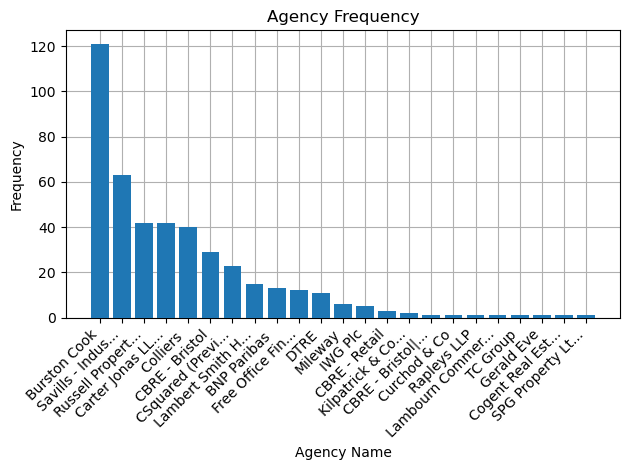

In [27]:
# Plotting bar graph by agency

import matplotlib.pyplot as plt

max_length = 15  # Adjust this value as needed

# Count occurrences of each unique category in 'Agency Name'
counts = df['Agency Name'].value_counts()

# Count occurrences of each unique category in 'Agency Name'
categories = df['Agency Name'].value_counts().index  # Unique categories
values = df['Agency Name'].value_counts().values     # Corresponding counts


categories = [name[:max_length] + '...' if len(name) > max_length else name for name in counts.index]
# Create a bar chart
plt.bar(categories, values, zorder=3)

# Add title and labels
plt.title('Agency Frequency')
plt.xlabel('Agency Name')
plt.ylabel('Frequency')
plt.grid(True, zorder=0)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [28]:
# Email draft - only if dropped - ACTUALLY DOES MAILTO NOW

for index in df_changes.index:
    if df_changes.loc[index, 'Website Status'] == 'Dropped':
# pd.set_option('display.max_colwidth', None)
        pd.set_option('display.max_colwidth', 100)

        email_body = f"""Hi {df_changes.iloc[index]['First Name']},\n 
I see that {df_changes.iloc[index]['Address']} has been taken off the wesbites. Please could you let me know the tenant, rent and lease length?\n
Thanks,\n [INSERT SIGNATURE]\n"""
        # text like this doesnt need to be indented for some reason.

        my_email = ''
        my_password = ''
        if not pd.isna(df_changes.iloc[index]['Email']):
            email_address = df_changes.iloc[index]['Email']
            # print(f'mailto:{email_address}')

            address = df_changes.iloc[index]['Address']
            subject = address[:30] + '...' 

            body = email_body.replace(' ', '%20').replace('\n','%0A')

            # webbrowser.open('mailto:?to=' + email_address + '&subject=' + subject + '&body=' + body, new=1)
        # Line above doesn't do anything (as far as I can tell) if email_address variable is empty. Result - I thought it might break it.
        else:
            print('No email address found.')
        
        # print(email_body)

print(f"\n\n\n {df_changes.iloc[-1]}")



# Email to Both Emilys, Maddie, Allan, Nathan & Rupert!!


No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.
No email address found.



 Id                                                                                                            6943011
Website Status                                                                                                Updated
Offer Status    

In [29]:
# Alternative method for emails - main method in box above

# outlook = win32.Dispatch('outlook.application')
# mail = outlook.CreateItem(0)

# # Set email parameters
# mail.To = email_address
# mail.Subject = subject
# mail.Body = email_body

# # mail.Display(True)